In [ ]:
# 라이브러리

In [21]:
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import f_oneway


In [ ]:
# 데이터 가져오기

In [1]:
# 압축 파일 이름과 경로 (같은 폴더에 있으면 파일명만 지정)
zip_file = 'data.zip'
extract_dir = './extracted_data'  # 압축 해제할 폴더 이름

# 폴더가 없으면 생성
os.makedirs(extract_dir, exist_ok=True)

# 압축 풀기
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("압축 해제 완료. 파일 목록:")
print(os.listdir(extract_dir))


압축 해제 완료. 파일 목록:
['test.csv', 'train.csv', 'sample_submission.csv']


In [4]:
train_df = pd.read_csv(os.path.join(extract_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(extract_dir, 'test.csv'))
sample_submission_df = pd.read_csv(os.path.join(extract_dir, 'sample_submission.csv'))


In [6]:
train_df.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [7]:
test_df.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,TEST_0000,F,72,161.95,77.66,312.36,137,112,131.16,0.51,moderate,current-smoker,high blood pressure,heart disease,oversleeping,graduate degree,NaN
1,TEST_0001,F,84,152.35,58.70,269.54,162,95,129.36,0.51,intense,current-smoker,NaN,NaN,normal,graduate degree,NaN
2,TEST_0002,F,45,164.09,76.71,209.08,146,91,169.21,1.13,light,ex-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,6.0
3,TEST_0003,M,58,165.06,76.34,246.52,146,98,133.78,0.52,light,current-smoker,heart disease,heart disease,sleep difficulty,high school diploma,10.0
4,TEST_0004,F,35,158.17,65.60,181.24,142,80,73.93,1.42,moderate,ex-smoker,diabetes,heart disease,oversleeping,NaN,7.0


In [8]:
sample_submission_df

,ID,stress_score
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
2995,TEST_2995,0
2996,TEST_2996,0
2997,TEST_2997,0
2998,TEST_2998,0


In [ ]:
# ID: 각 행(사람)을 구분하는 고유 식별자 (예: TRAIN_0000)
# gender: 성별 (M=남성, F=여성)
# age: 나이 (세)
# height: 키 (cm)
# weight: 체중 (kg)
# cholesterol: 총 콜레스테롤 수치 (mg/dL 또는 유사 단위, 높을수록 고지혈증 위험 증가)
# systolic_blood_pressure: 수축기 혈압(최고 혈압, mmHg)
# diastolic_blood_pressure: 이완기 혈압(최저 혈압, mmHg)
# glucose: 혈당 수치 (mg/dL, 공복혈당 기준일 가능성 있음)
# bone_density: 골밀도 지수 (단위는 T-score 또는 측정값, 높을수록 뼈 건강 양호)
# activity: 신체 활동 수준 (light=가벼움, moderate=중간, intense=높음)
# smoke_status: 흡연 상태 (non-smoker, ex-smoker, smoker 등)
# medical_history: 과거/현재 의학적 진단 기록 (예: high blood pressure, diabetes)
# family_medical_history: 가족력 정보 (예: diabetes=가족 중 당뇨병 병력 있음)
# sleep_pattern: 수면 패턴 (normal, oversleeping, sleep difficulty 등)
# edu_level: 교육 수준 (high school diploma, bachelors degree, graduate degree 등)
# mean_working: 하루 평균 근무 시간 (시간 단위, NaN이면 미기입)
# stress_score: 스트레스 점수 (0~1 범위 가능, 값이 높을수록 스트레스 수준 높음)


In [10]:
# EDA

df = train_df

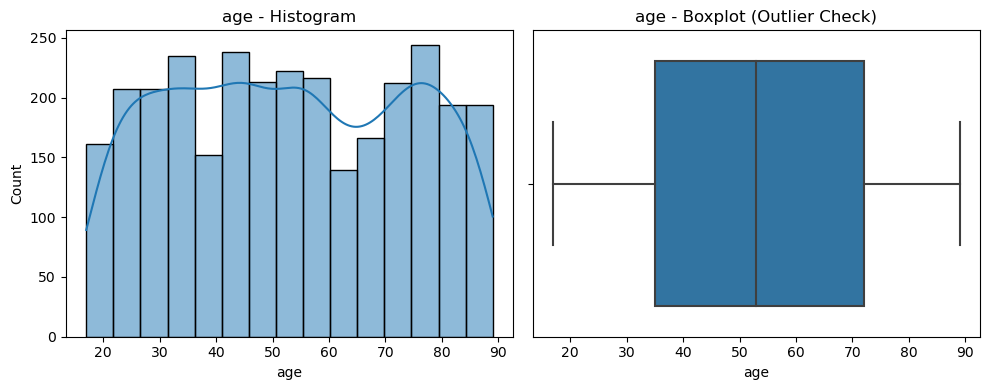

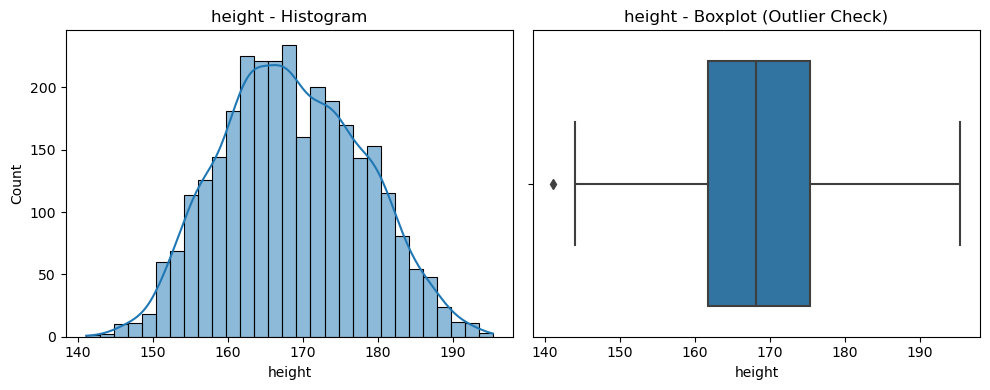

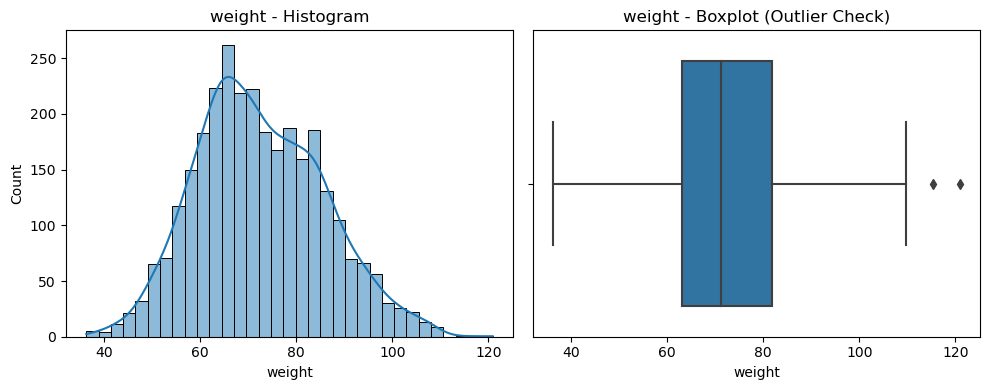

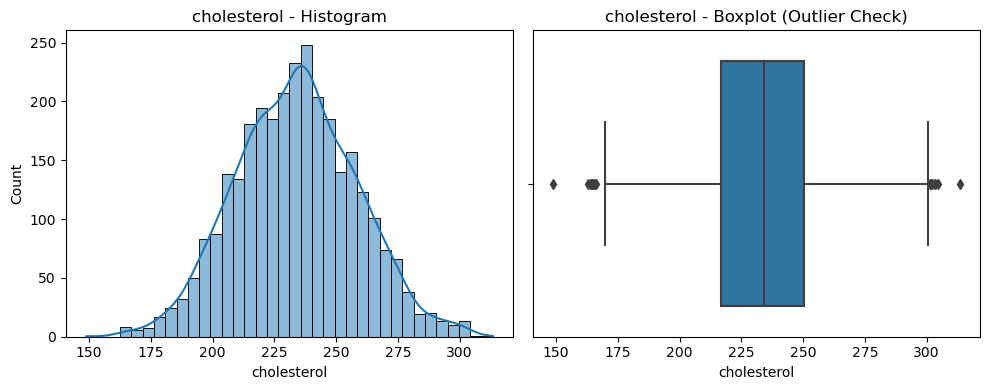

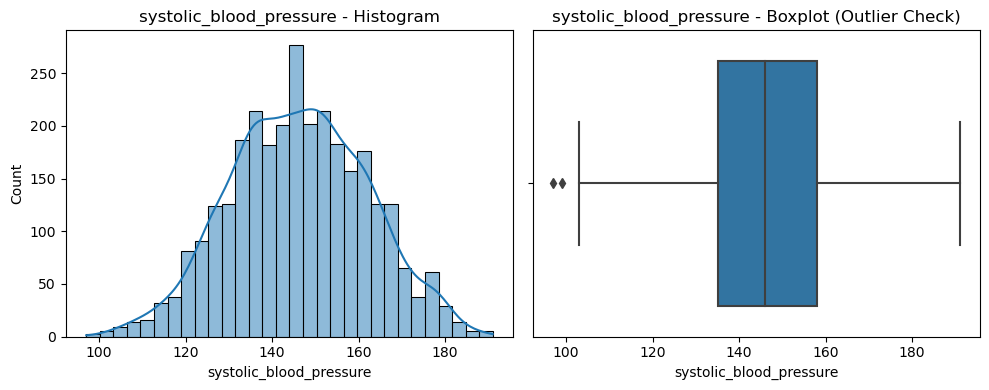

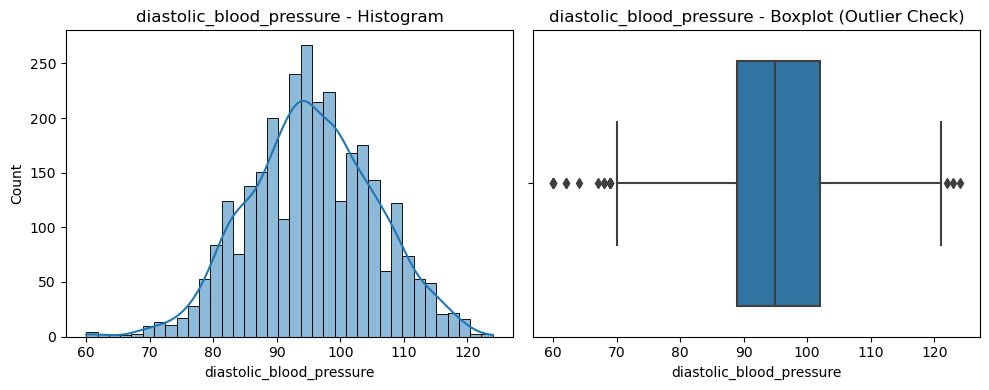

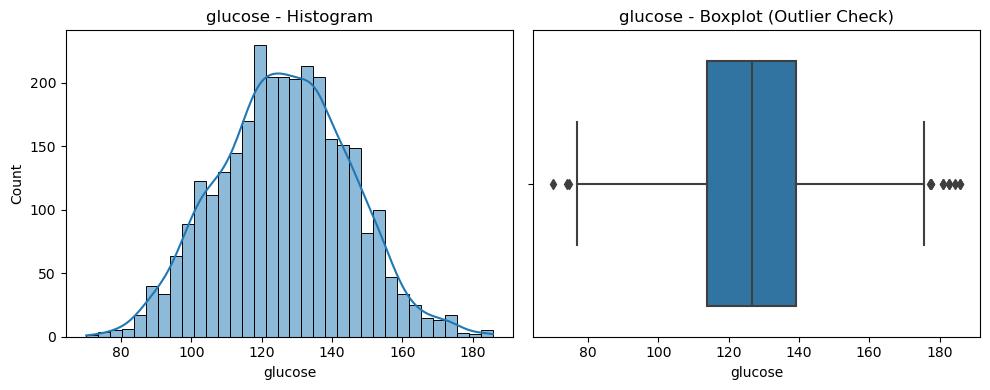

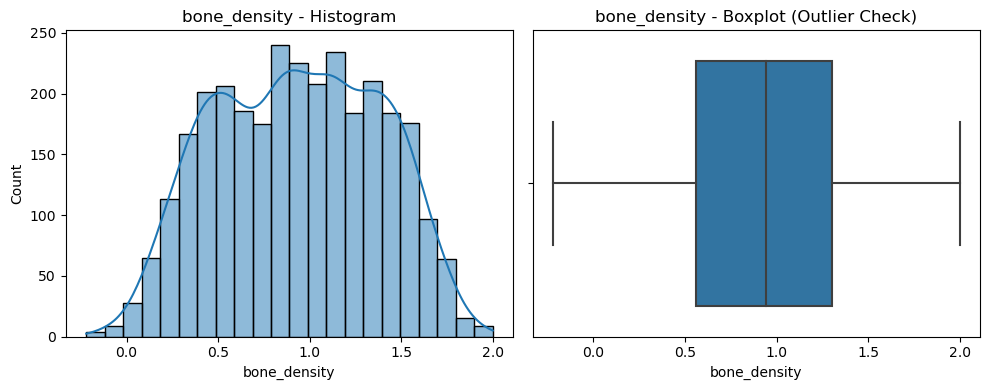

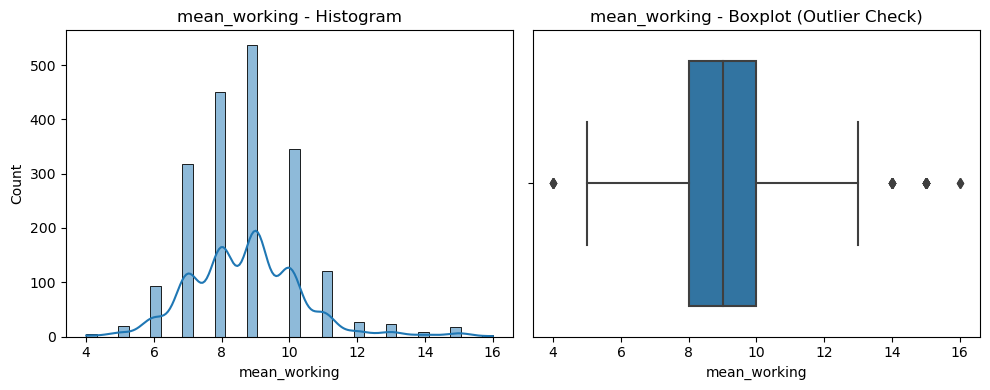

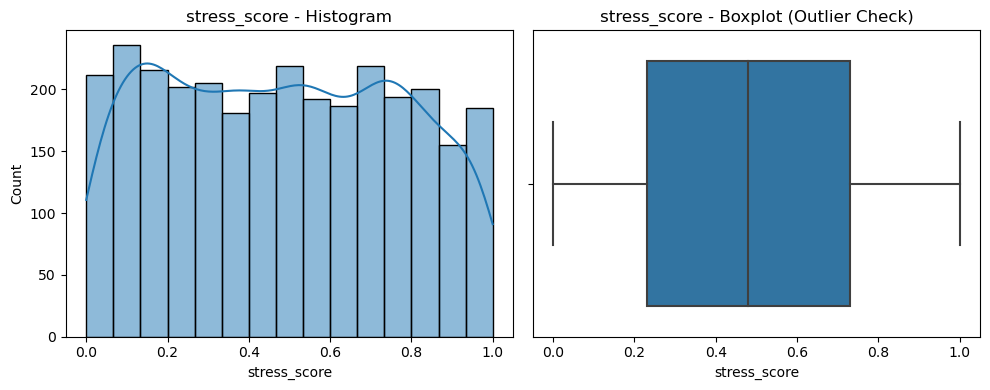

In [18]:
## 분포도
# 수치형 변수 선택 (ID, stress_score 제외 가능)
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c != 'ID']

# 시각화
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # 히스토그램 + 커널밀도
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"{col} - Histogram")
    
    # 박스플롯
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"{col} - Boxplot (Outlier Check)")
    
    plt.tight_layout()
    plt.show()

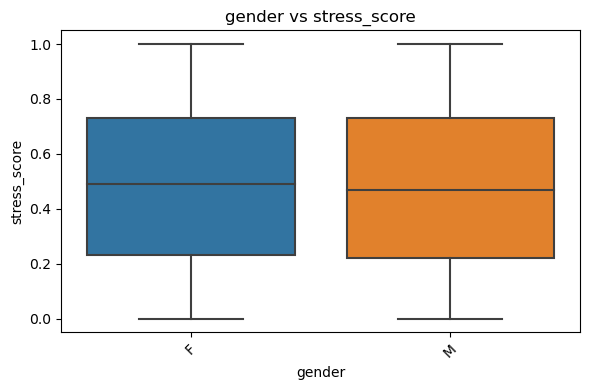

📊 gender - ANOVA p-value: 0.4558
   ➡ gender에 따라 stress_score 평균 차이가 유의하지 않음.



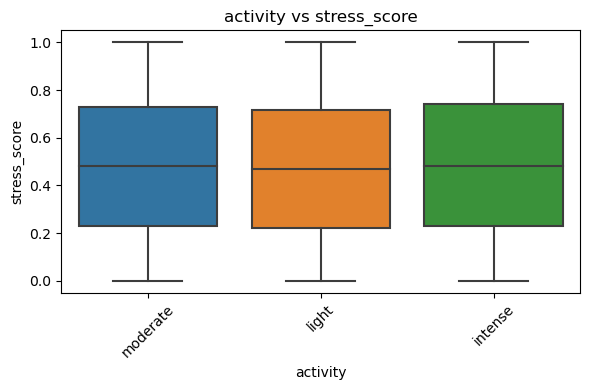

📊 activity - ANOVA p-value: 0.4995
   ➡ activity에 따라 stress_score 평균 차이가 유의하지 않음.



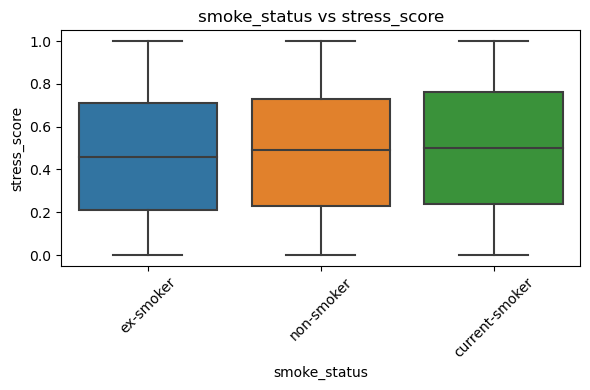

📊 smoke_status - ANOVA p-value: 0.1721
   ➡ smoke_status에 따라 stress_score 평균 차이가 유의하지 않음.



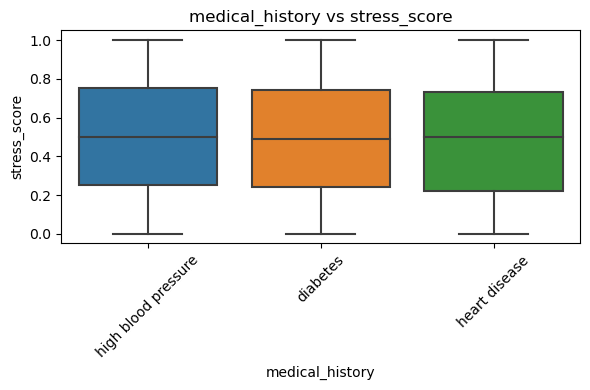

📊 medical_history - ANOVA p-value: 0.4866
   ➡ medical_history에 따라 stress_score 평균 차이가 유의하지 않음.



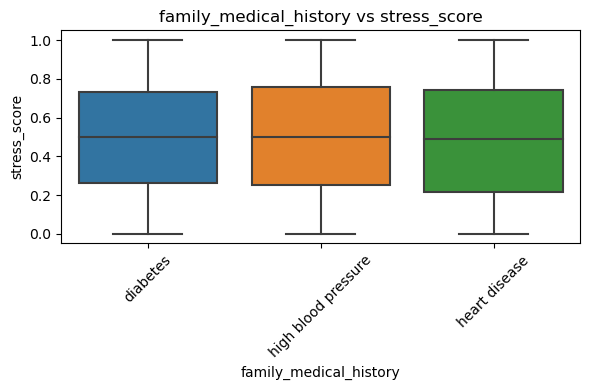

📊 family_medical_history - ANOVA p-value: 0.6719
   ➡ family_medical_history에 따라 stress_score 평균 차이가 유의하지 않음.



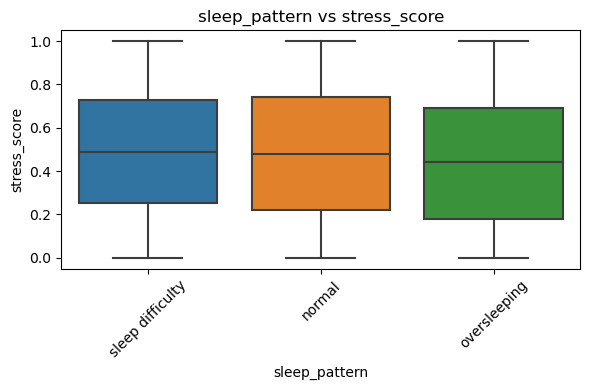

📊 sleep_pattern - ANOVA p-value: 0.0821
   ➡ sleep_pattern에 따라 stress_score 평균 차이가 유의하지 않음.



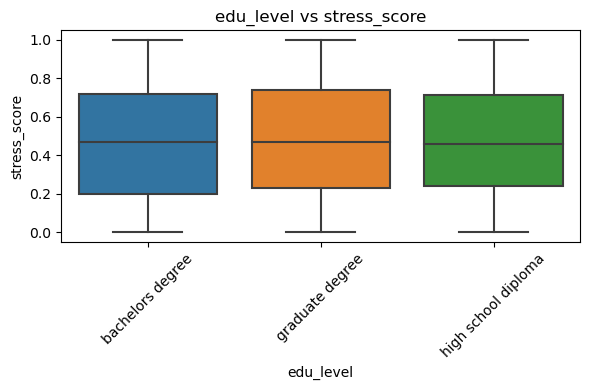

📊 edu_level - ANOVA p-value: 0.4256
   ➡ edu_level에 따라 stress_score 평균 차이가 유의하지 않음.



In [22]:
target = 'stress_score'

# 범주형 변수 선택 (ID 제외)
id_like_cols = {'ID'}
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in id_like_cols]

# 시각화 + ANOVA 테스트
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    
    # 박스플롯: 범주별 stress_score 분포
    sns.boxplot(x=col, y=target, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.show()
    
    # ANOVA (그룹별 값 리스트 만들기)
    groups = [group[target].dropna().values for name, group in df.groupby(col)]
    if len(groups) > 1:
        stat, p_value = f_oneway(*groups)
        print(f"📊 {col} - ANOVA p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"   ➡ {col}에 따라 {target} 평균 차이가 통계적으로 유의함.")
        else:
            print(f"   ➡ {col}에 따라 {target} 평균 차이가 유의하지 않음.")
    print()
    
    
# gender, activity, smoke_status, medical_history, family_medical_history, sleep_pattern, edu_level


In [19]:
## 상관관계
target = 'stress_score'

# 수치형 / 범주형 분리 (ID 제외)
id_like_cols = {'ID'}
cols = [c for c in df.columns if c not in id_like_cols]

numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
cat_cols     = [c for c in cols if df[c].dtype == 'object']

# 수치형 상관계수
num_corr = (
    df[numeric_cols]
    .corr()[target]
    .drop(labels=[target], errors='ignore')
)

# 범주형 상관계수 (원-핫 인코딩 후 절댓값이 가장 큰 더미 선택)
cat_corr_dict = {}
if len(cat_cols) > 0:
    dummies = pd.get_dummies(df[cat_cols], dummy_na=False)
    dummies[target] = df[target]
    corr_all = dummies.corr()[target].drop(labels=[target], errors='ignore')

    for col in cat_cols:
        prefix = f"{col}_"
        matched = corr_all[[c for c in corr_all.index if c.startswith(prefix)]]
        if matched.empty:
            continue
        idx_max = matched.abs().idxmax()
        cat_corr_dict[col] = matched.loc[idx_max]

# 결합
all_corr = pd.concat([
    num_corr.rename('corr'),
    pd.Series(cat_corr_dict, name='corr')
], axis=0)

# NaN 제거 후 실제 값 기준 내림차순 정렬
all_corr_sorted = all_corr.dropna().sort_values(ascending=False)

# 출력
print("=== stress_score와 각 변수의 상관계수 (값 기준 내림차순) ===")
print(all_corr_sorted)

# mean_working

=== stress_score와 각 변수의 상관계수 (값 기준 내림차순) ===
mean_working                0.183433
medical_history             0.037315
family_medical_history      0.029869
diastolic_blood_pressure    0.025351
cholesterol                 0.021288
age                         0.018656
systolic_blood_pressure     0.015635
weight                      0.011328
height                     -0.005664
glucose                    -0.006083
gender                     -0.013620
activity                   -0.021353
bone_density               -0.022556
smoke_status               -0.031971
edu_level                  -0.036516
sleep_pattern              -0.040681
Name: corr, dtype: float64


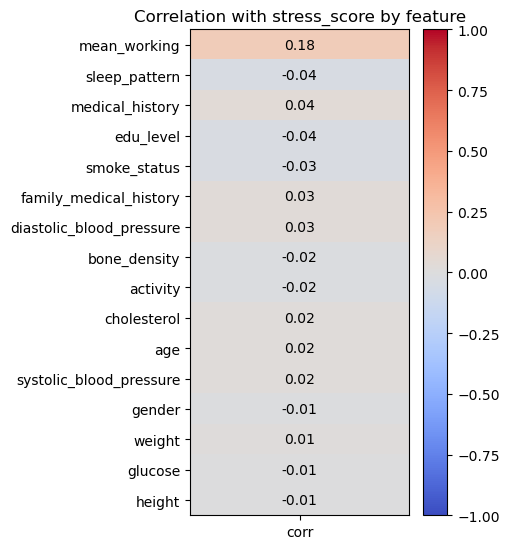

In [14]:
## 각 지표별 상관 관계 히트맵
target = 'stress_score'
assert target in df.columns, f"'{target}' 컬럼이 존재하지 않습니다."

# 3) 수치형 / 범주형 분리
#    - ID 등 식별자는 제외
id_like_cols = {'ID'}
cols = [c for c in df.columns if c not in id_like_cols]

numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
cat_cols     = [c for c in cols if (df[c].dtype == 'object')]

# 4) 수치형 변수의 상관계수 (Pearson)
num_corr = (
    df[numeric_cols]
    .corr()[target]
    .drop(labels=[target], errors='ignore')
)

# 5) 범주형 변수 처리: 원-핫 인코딩 후, 변수별 최댓값(|corr|)을 대표값으로 사용
cat_corr_dict = {}
if len(cat_cols) > 0:
    dummies = pd.get_dummies(df[cat_cols], dummy_na=False)  # 더미 생성
    # target과 더미들 간 상관
    dummies[target] = df[target]
    corr_all = dummies.corr()[target].drop(labels=[target], errors='ignore')

    # 더미 컬럼명에서 원래 변수명 추출 (pandas.get_dummies의 MultiIndex 안 쓰는 간단 방식)
    # ex) 'gender_F', 'gender_M' -> 'gender'
    for col in cat_cols:
        # 해당 변수의 더미들만 선택
        prefix = f"{col}_"
        matched = corr_all[[c for c in corr_all.index if c.startswith(prefix)]]
        if matched.empty:
            continue
        # 절댓값 기준 최댓값을 대표값으로 사용 (부호는 해당 더미의 실제 상관 부호 유지)
        idx_max = matched.abs().idxmax()
        cat_corr_dict[col] = matched.loc[idx_max]

# 6) 결합: (수치형 + 범주형 대표 상관)
all_corr = pd.concat([
    num_corr.rename('corr'),
    pd.Series(cat_corr_dict, name='corr')
], axis=0)

# 7) NaN 제거 및 정렬 (절댓값 큰 순)
all_corr = all_corr.dropna()
all_corr = all_corr.reindex(all_corr.abs().sort_values(ascending=False).index)

# 8) 히트맵 그리기 (한 열짜리 히트맵)
fig, ax = plt.subplots(figsize=(5, max(4, len(all_corr)*0.35)))
im = ax.imshow(all_corr.values.reshape(-1, 1), aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)  # 색상 지정 X (기본값 사용)

# y축: 변수명, x축: 열 이름(여기선 'corr' 하나)
ax.set_yticks(np.arange(len(all_corr)))
ax.set_yticklabels(all_corr.index)
ax.set_xticks([0])
ax.set_xticklabels(['corr'])

# 상관 수치 표시(가독성 위해 상단에 텍스트도 추가 가능)
for i, v in enumerate(all_corr.values):
    ax.text(0, i, f"{v:.2f}", ha='center', va='center')

ax.set_title("Correlation with stress_score by feature")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# 9) 상위 20개 표로 확인 (원하면 주석 해제)
# from IPython.display import display
# display(all_corr.head(20).to_frame("corr"))


In [ ]:
# 학습
# 이상치 제거 데이터 / 제거하지 않은 데이터

In [ ]:
# 예측

In [ ]:
# 생각
각 지표별로 스트레스 지수와의 상관관계 확인 -> 0에 가까웠음
이상치가 있나 해서 분포 확인 후 이상치 제거

이상치 제거
각 지표별 스트레스 지수와의 상관관계 히트맵